<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/Proyecto_ParteII_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tercer desafío | Data Science

En esta oportunidad usaré el dataset: Perth House Price

Con el cuál vengo trabajando en los anteriores desafios.

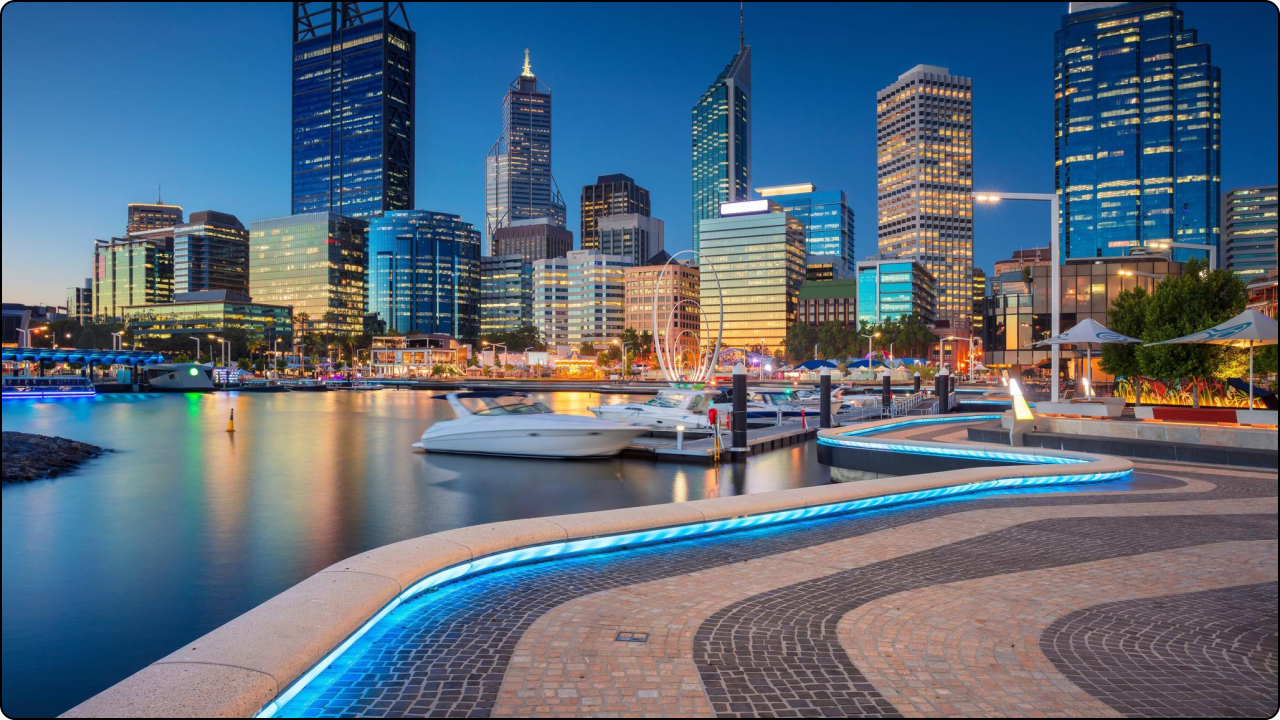

# Preparación de los datos

In [1]:
# Codigo para trabajar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = "/content/drive/MyDrive/Primera Entrega (Data Science)/Bases de datos/Perth Data.csv"
df = pd.read_csv(PATH)

# Información de mi dataset

*   `ADDRESS`: Dirección de la propiedad.
*   `SUBURB`: Suburbios donde pertenece la propiedad.
*   `PRICE`: Precio al que se vendio la propiedad.
*   `BEDROOMS`: Número de habitaciones.
*   `BATHROOMS`: Número de baños.
*   `GARAGE`: Número de garajes.
*   `LAND_AREA`: Superficie del terrerno. (m^2)
*   `FLOOR_AREA`: Superficie interna de la propiedad. (m^2)
*   `BUILD_YEAR`: Año que se construyo la propiedad.
*   `CBD_DIST`: Distancia desde el centro de Perth.
*   `NEAREST_STN`: Estación de transporte público más cercana.
*   `NEAREST_STN_DIST`: La distancia a la estación más cercana (m).
*   `DATE_SOLD`: Fecha que se vendió la propiedad.
*   `POSTCODE`: Codigo Postal
*   `LATITUDE`: Latitud
*   `LONGITUDE`: Longitud
*   `NEAREST_SCH`: Escuela más cercana.
*   `NEAREST_SCH_DIST`:Distancia a la escuela más cercana.
*   `NEAREST_SCH_RANK`: Clasificación de la escuela más cercana.


In [4]:
df.shape

(33656, 19)

In [5]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [6]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['address', 'suburb', 'price', 'bedrooms', 'bathrooms', 'garage',
       'land_area', 'floor_area', 'build_year', 'cbd_dist', 'nearest_stn',
       'nearest_stn_dist', 'date_sold', 'postcode', 'latitude', 'longitude',
       'nearest_sch', 'nearest_sch_dist', 'nearest_sch_rank'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           33656 non-null  object 
 1   suburb            33656 non-null  object 
 2   price             33656 non-null  int64  
 3   bedrooms          33656 non-null  int64  
 4   bathrooms         33656 non-null  int64  
 5   garage            31178 non-null  float64
 6   land_area         33656 non-null  int64  
 7   floor_area        33656 non-null  int64  
 8   build_year        30501 non-null  float64
 9   cbd_dist          33656 non-null  int64  
 10  nearest_stn       33656 non-null  object 
 11  nearest_stn_dist  33656 non-null  int64  
 12  date_sold         33656 non-null  object 
 13  postcode          33656 non-null  int64  
 14  latitude          33656 non-null  float64
 15  longitude         33656 non-null  float64
 16  nearest_sch       33656 non-null  object

In [8]:
#Tipos de variables
print("Número por tipo de columna:")
print(str(df.dtypes.value_counts()))
print("Cantidad de variables: "+ str(len(df.columns)))

Número por tipo de columna:
int64      8
float64    6
object     5
dtype: int64
Cantidad de variables: 19


In [9]:
# Valores nulos EN NÚMERO
df.isnull().sum().sort_values(ascending=False)

nearest_sch_rank    10952
build_year           3155
garage               2478
nearest_stn_dist        0
nearest_sch_dist        0
nearest_sch             0
longitude               0
latitude                0
postcode                0
date_sold               0
address                 0
nearest_stn             0
suburb                  0
floor_area              0
land_area               0
bathrooms               0
bedrooms                0
price                   0
cbd_dist                0
dtype: int64

In [10]:
# Valores nulos EN PORCENTAJE
porcentaje_nulos = df.isnull().mean() * 100
porcentaje_nulos = porcentaje_nulos.round(2)  # Redondear a 2 cifras decimales
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)

print(porcentaje_nulos)

nearest_sch_rank    32.54
build_year           9.37
garage               7.36
nearest_stn_dist     0.00
nearest_sch_dist     0.00
nearest_sch          0.00
longitude            0.00
latitude             0.00
postcode             0.00
date_sold            0.00
address              0.00
nearest_stn          0.00
suburb               0.00
floor_area           0.00
land_area            0.00
bathrooms            0.00
bedrooms             0.00
price                0.00
cbd_dist             0.00
dtype: float64


# Estadisticos de mi dataset

In [11]:
def estadisticos_cont(num):
    # Calculamos describe
    estadisticos = num.describe().T
    # Añadimos la mediana
    estadisticos['median'] = num.median()
    # Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]

    # Redondeamos los valores flotantes a 2 decimales, excluyendo "count"
    for col in estadisticos.columns:
        if col != "count" and estadisticos[col].dtype == 'float64':
            estadisticos[col] = estadisticos[col].apply(lambda x: "{:,.2f}".format(x))

    # Formateamos "count" para eliminar decimales
    estadisticos["count"] = estadisticos["count"].apply(lambda x: "{:,.0f}".format(x))

    # Lo devolvemos
    return estadisticos

In [12]:
# Llamada a la función con el DataFrame df
resultados = estadisticos_cont(df.select_dtypes('number'))
resultados

,count,mean,median,std,min,25%,50%,75%,max
price,"33,656","637,072.01","535,500.00","355,825.63","51,000.00","410,000.00","535,500.00","760,000.00","2,440,000.00"
bedrooms,"33,656",3.66,4.00,0.75,1.00,3.00,4.00,4.00,10.00
bathrooms,"33,656",1.82,2.00,0.59,1.00,1.00,2.00,2.00,16.00
garage,"31,178",2.20,2.00,1.37,1.00,2.00,2.00,2.00,99.00
land_area,"33,656","2,740.64",682.00,"16,693.51",61.00,503.00,682.00,838.00,"999,999.00"
floor_area,"33,656",183.50,172.00,72.10,1.00,130.00,172.00,222.25,870.00
build_year,"30,501","1,989.71","1,995.00",20.96,"1,868.00","1,978.00","1,995.00","2,005.00","2,017.00"
cbd_dist,"33,656","19,777.37","17,500.00","11,364.42",681.00,"11,200.00","17,500.00","26,600.00","59,800.00"
nearest_stn_dist,"33,656","4,523.37","3,200.00","4,495.06",46.00,"1,800.00","3,200.00","5,300.00","35,500.00"
postcode,"33,656","6,089.42","6,069.00",62.17,"6,003.00","6,050.00","6,069.00","6,150.00","6,558.00"


# EDA

## Gráficos Univariados

### Variables númericas

In [13]:
# Variables númericas
df_num = df.iloc[:, 0:15].select_dtypes(include='number')
df_num1 = ["price","land_area", "floor_area","build_year", "cbd_dist", "nearest_stn_dist"]
df_num2 = df.loc[:, df_num1]

In [14]:
print(df_num2.columns)

Index(['price', 'land_area', 'floor_area', 'build_year', 'cbd_dist',
       'nearest_stn_dist'],
      dtype='object')


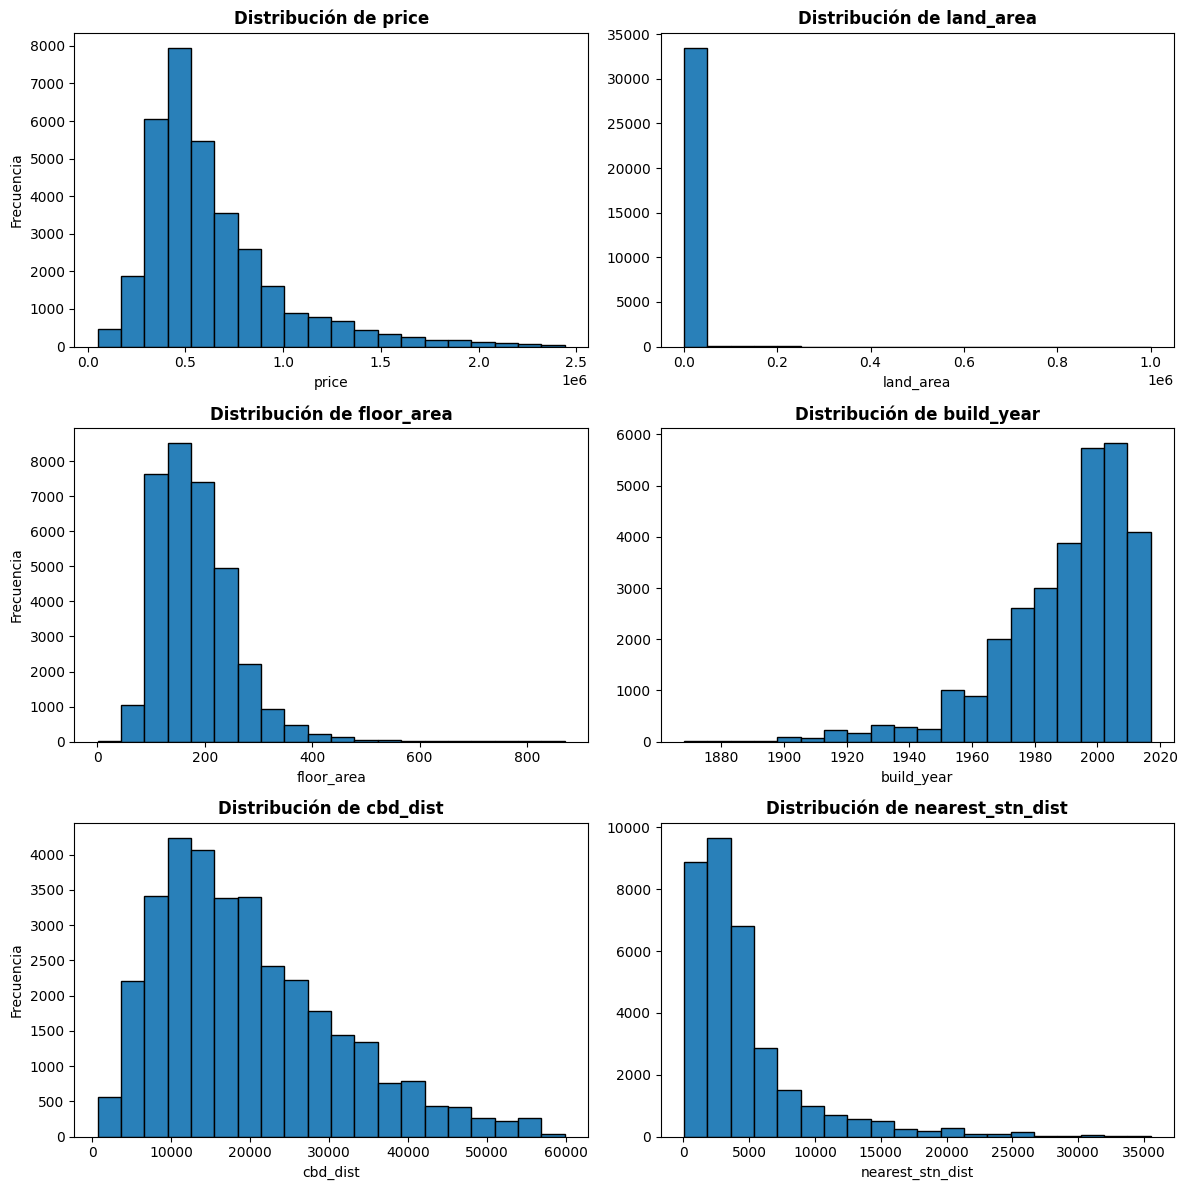

In [15]:
num_vars = len(df_num2.columns)
num_rows = math.ceil(num_vars / 2)

fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

for i, column in enumerate(df_num2.columns):
    row = i // 2
    col = i % 2

    axs[row, col].hist(df_num[column], bins=20, edgecolor="black", color="#2980b9")
    axs[row, col].set_title(f"Distribución de {column}", fontsize = 12, fontweight = "bold")
    axs[row, col].set_xlabel(column)
    if col == 0:  # Solo mostrar "Frecuencia" en la primera columna
        axs[row, col].set_ylabel("Frecuencia")
    else:
        axs[row, col].set_ylabel("")  # Dejar vacío para las demás columnas

# Eliminar cuadros vacíos
if num_vars % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()

*En este gráfico podemos observar como se distribuyen nuestras variables númericas más interesantes, dandonos ciertos indicios de como se relacionan entre ellas.*

**Por ejemplo,** tanto el precio (price), la superficie interna de la propiedad (floor_area) , la distancia desde el centro de Perth (cbd_dist) y la estación de transporte público más cercana (nearest_stn).

Comparten asimetria positiva, esto nos quiere decir que es muy probable que:

*   La media de los precios sean bajos.
*   Sea común encontrar casas con superficie interna de la propiedad no tan exagerada.
*   La mayoría de casas no esten tan lejos del centro de Perth
*   La estación de transporte esta cerca.

Podemos apreciar que (buil_year), año que se construyo la propiedad.
Presente asimetria negativa, lo cuál nos indica que mientras han transcurrido los años se ha ido construyendo más casas en la ciudad.

### Variables categoricas

In [16]:
df_cat = df.iloc[:, 0:15].select_dtypes(include='object')
df_cat1 = ["bedrooms","bathrooms","garage"]
df_cat2 = df.loc[:, df_cat1]

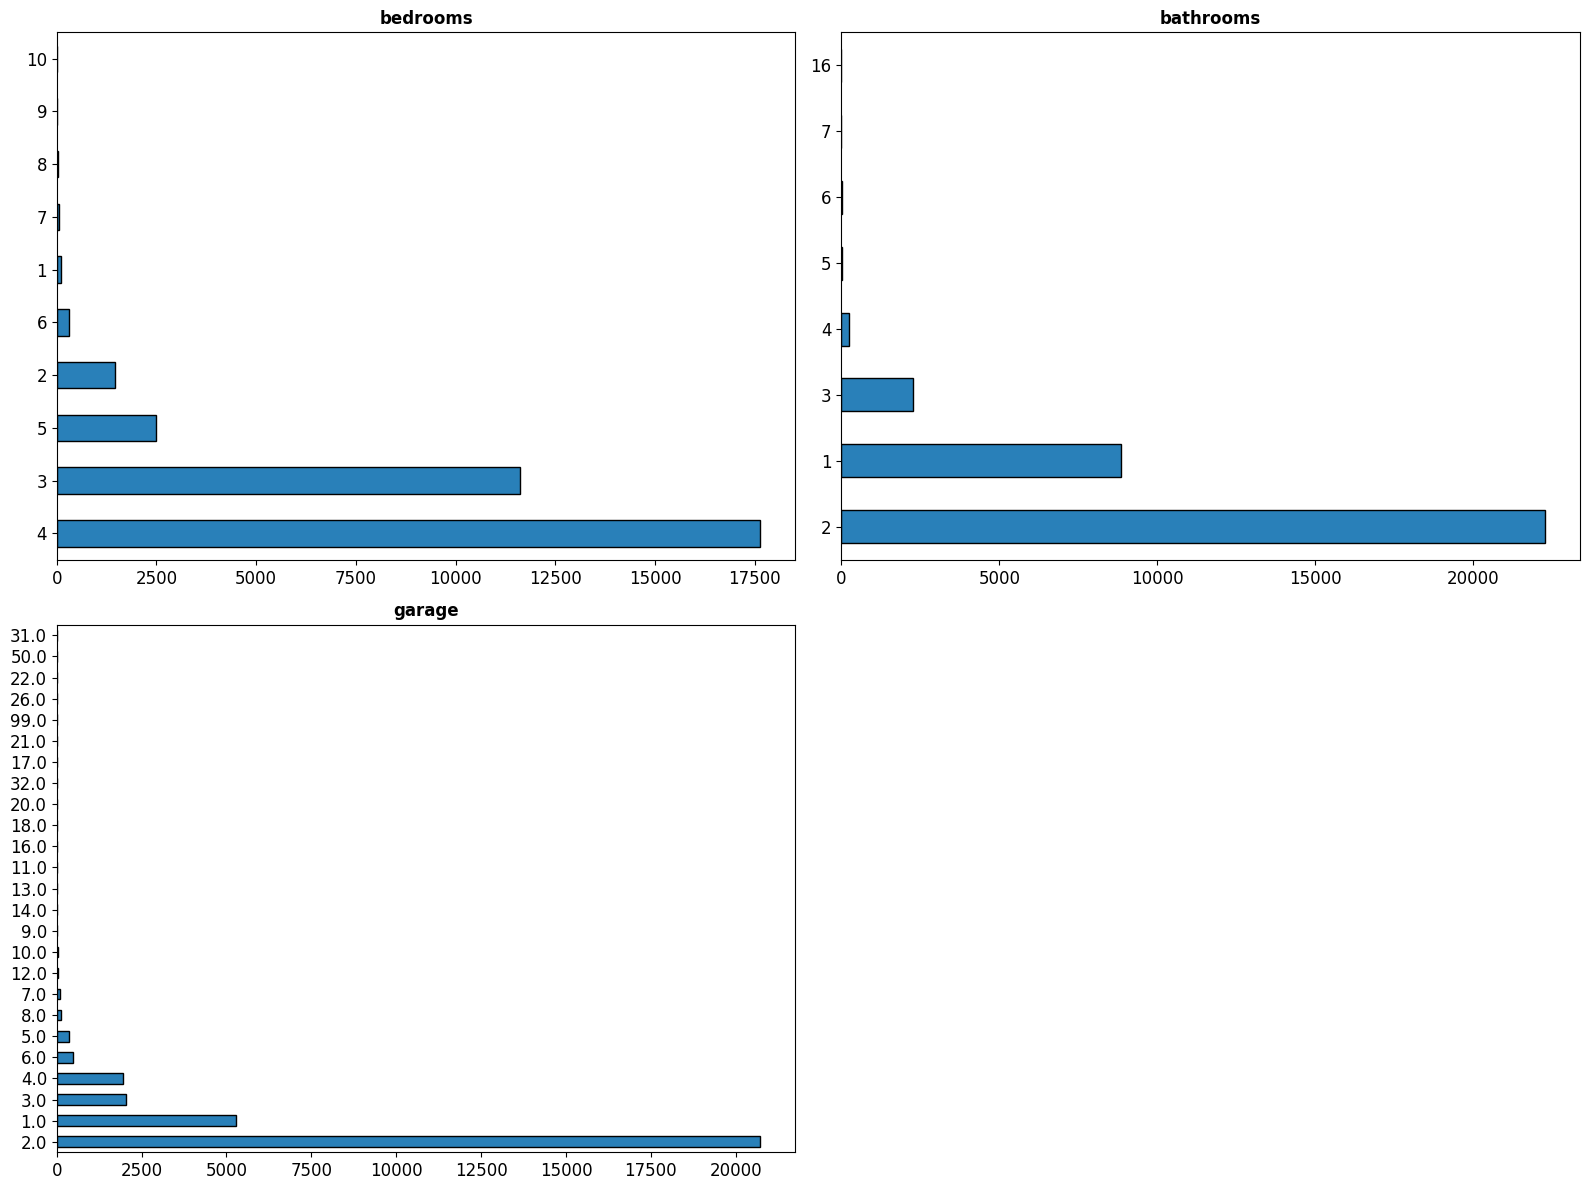

In [17]:
# Suponiendo que 'df_cat2' es tu DataFrame con las columnas categóricas
num_vars = len(df_cat2.columns)
num_rows = math.ceil(num_vars / 2)

# Creamos la figura y los ejes para los gráficos
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))

# Creamos el bucle que va añadiendo gráficos
for i, variable in enumerate(df_cat2.columns):
    row = i // 2
    col = i % 2

    # Graficamos el conteo de cada categoría en forma de barras horizontales
    df_cat2[variable].value_counts().plot.barh(ax=axs.reshape(-1)[i], color="#2980b9", edgecolor='black', linewidth=1)

    # Configuramos el título y tamaño de fuente
    axs.reshape(-1)[i].set_title(variable, fontsize=12, fontweight="bold")
    axs.reshape(-1)[i].tick_params(labelsize=12)

# Eliminar cuadros vacíos
if num_vars % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()
# Mostramos los gráficos
plt.show()

*Como parte de este analisis, no podemos dejar de lado las variables categoricas que nos permitiran explicar más adelante el precio de una casa en Perth.*

Podemos visualizar que es común encontrar casas con 4 habitaciones, 2 baños y 2 garages.

Pues, es lo que se encuentra en mayor medida en Perth.

## Gráficos Bivariados

<ipython-input-18-f6133c28e1a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


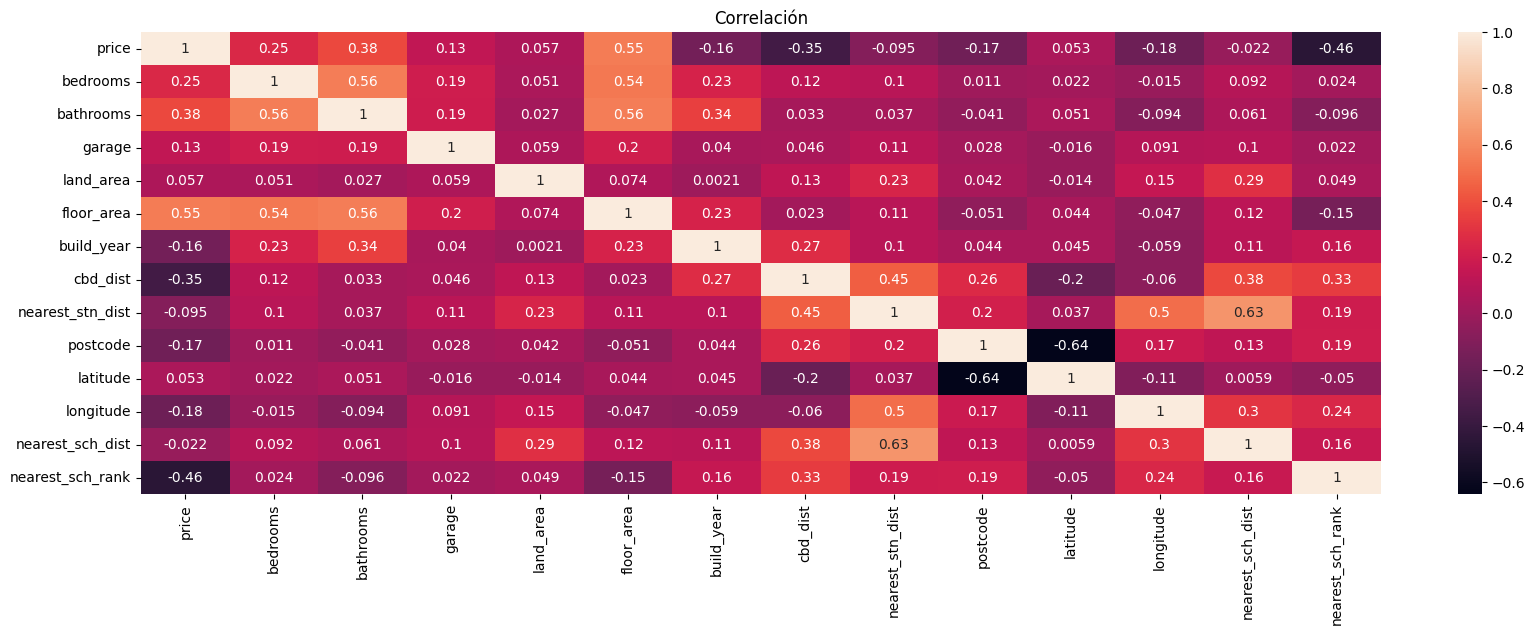

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlación")
plt.show()

*En este heatmap podemos apreciar la correlación de la variables de estudio, debemos tener en cuenta que correlación no implica causalidad, esto quiere decir, que a pesar de presentar alta correlación positiva o negativa se debe averiguar si esto tiene sentido.*

**Como variables más interesantes tenemos**

*Correlación positiva*: Más cerca a 1

1.   floor_area (0.55)
2.   bathrooms (0.38)
1.   bedrooms (0.25)
2.   garage (0.13)

*Correlación negativa*: Más cercana a -1

1.   nearest_sch_rank (-0.46)
2.   cbd_dist (-0.35)


## Insights

**¿A que se debe los precios altos de las casas en Perth?**

Posibles respuestas:

*   Crecimiento económico
*   Desarrollo urbano limitado
*   Propiedades de la casa
*   Factores demográficos

Intentare explicar el precio de las casas de Perth estudiando sus propiedades, para esto primero estudiare las 3 variables categoricas gráficadas anteriormente.

### Insight 1

**Relación Habitaciones-Precio de la casa**

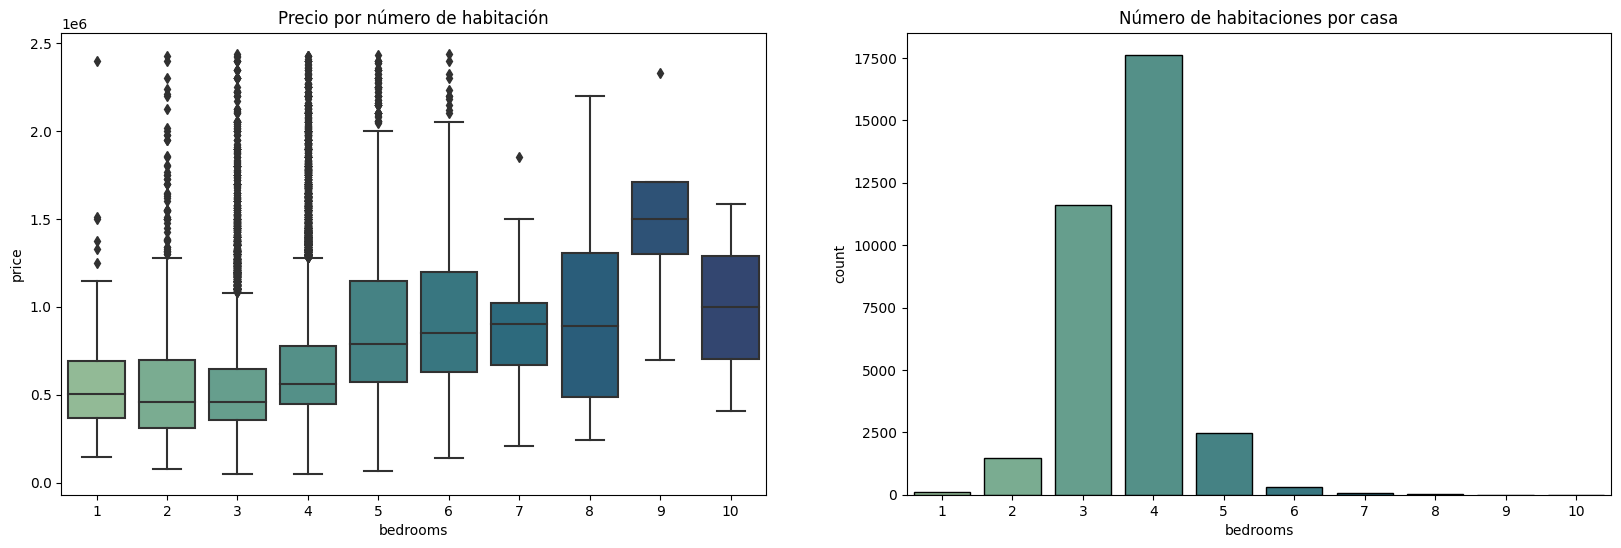

In [19]:
# INSIGHT_1
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Graf 1: Boxplot
sns.boxplot(x='bedrooms', y='price', data=df, ax=g1, palette="crest")
g1.set_title("Precio por número de habitación")

# Graf 2: Countplot
sns.countplot(x='bedrooms', data=df, ax=g2, palette="crest", edgecolor="black")
g2.set_title("Número de habitaciones por casa")

plt.show()

Interpretación:

*   Las casas con 9 habitaciones suelen tener más valor que las de 10 habitaciones.
*   Entre las casas de 1, 2, 3 y 4 habitaciones suelen tener precios que no difieren mucho.
*   Se presentan casos atipicos, donde se pueden encontrar casas demasiadas caras a pesar de no contar con tantas habitaciones.
*   Es común encontrar casas con 3 y 4 habitacciones.
*   No es tan común encontrar casas de más de 6 habitaciones.
*   Se puede observar que la media de precios va a aumentando cuando aumentan el número de habitaciones de 3 a 9.


### Insight 2

**Relación Baños-Precio de la casa**

Text(0.5, 1.0, 'Número de baños por casa')

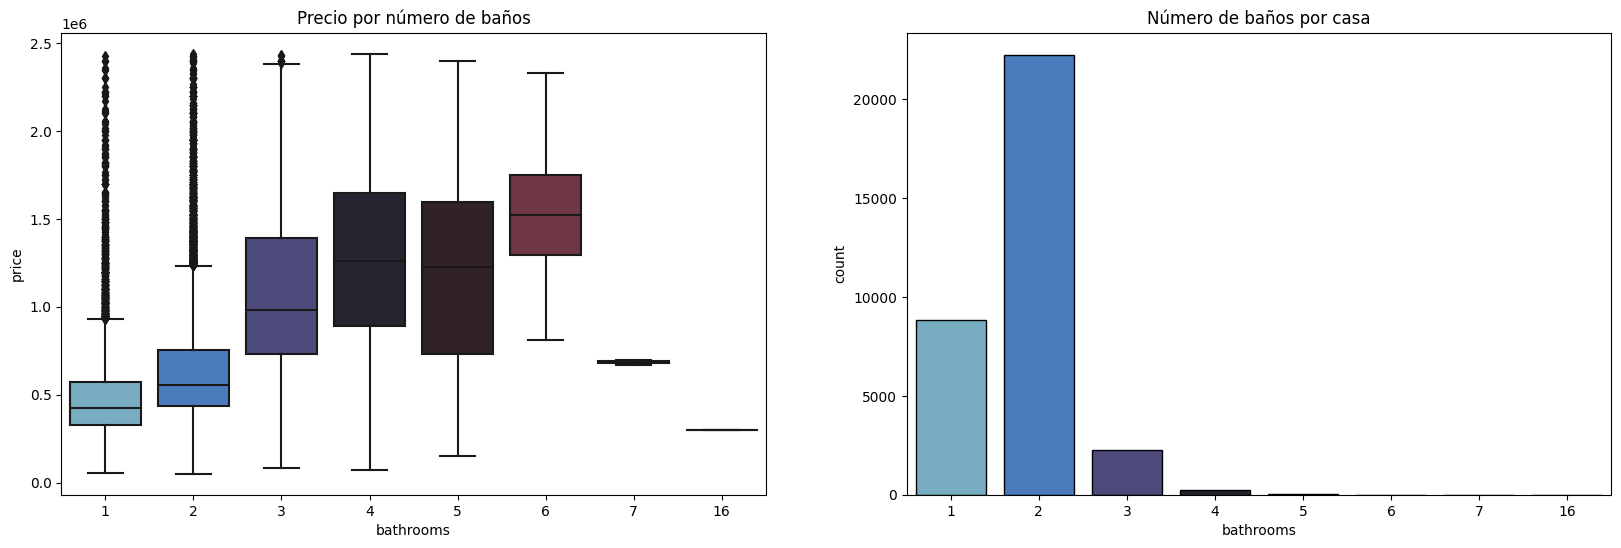

In [20]:
# INSIGHT_2
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico de caja (boxplot) utilizando Seaborn
sns.boxplot(x='bathrooms', y='price', data=df, ax=g1, palette="icefire")
g1.set_title("Precio por número de baños")

# Gráfico de conteo (countplot) utilizando Seaborn
sns.countplot(x='bathrooms', data=df, ax=g2, palette="icefire", edgecolor="black")
g2.set_title("Número de baños por casa")

Interpretación:

*   Las casas con más 6 baños pierden valor.
*   Podemos observar que la media de rpecios va en aumento en las casas 1 a 5 baños.
*   En el segundo gráfico, se puede observar que no es tan fácil encontrar casas con más de 5 baños.
*   Lo que más se tiene son casas con 2 baños, estas tienen una media de precios no tan alta, aunque tambien existen casas con gran valor (outliers).

### Insight 3

**Relación Garajes-Precio de la casa**

Text(0.5, 1.0, 'Número de garajes por casa')

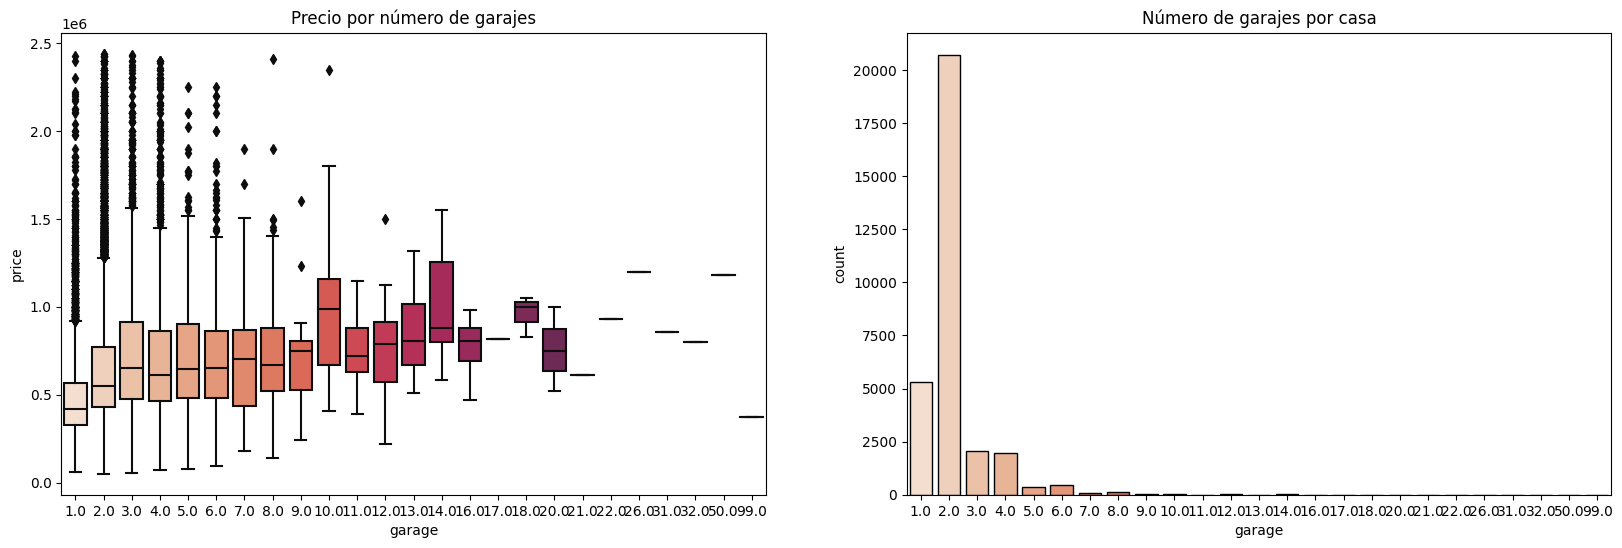

In [21]:
#  INSIGHT_3
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico de caja (boxplot) utilizando Seaborn
sns.boxplot(x='garage', y='price', data=df, ax=g1, palette="rocket_r")
g1.set_title("Precio por número de garajes")

# Gráfico de conteo (countplot) utilizando Seaborn
sns.countplot(x='garage', data=df, ax=g2, palette="rocket_r", edgecolor="black")
g2.set_title("Número de garajes por casa")

Interpretación:

*   La media de precios es muy parecida entre las casas con más de 2 garajes a 9 garajes.
*   Existen casas con 1 solo garaje que tienen precios muy elevados.
*   Las casas con 2 garajes son las más comunes en Perth
*   Existe una casa con 99 garajes, pero su precio no estan alto como una casa de 2 garajes.


### Insight 4

**Relación Año de construcción-Precio de la casa**

Text(0.5, 1.0, 'Casas construidas por años')

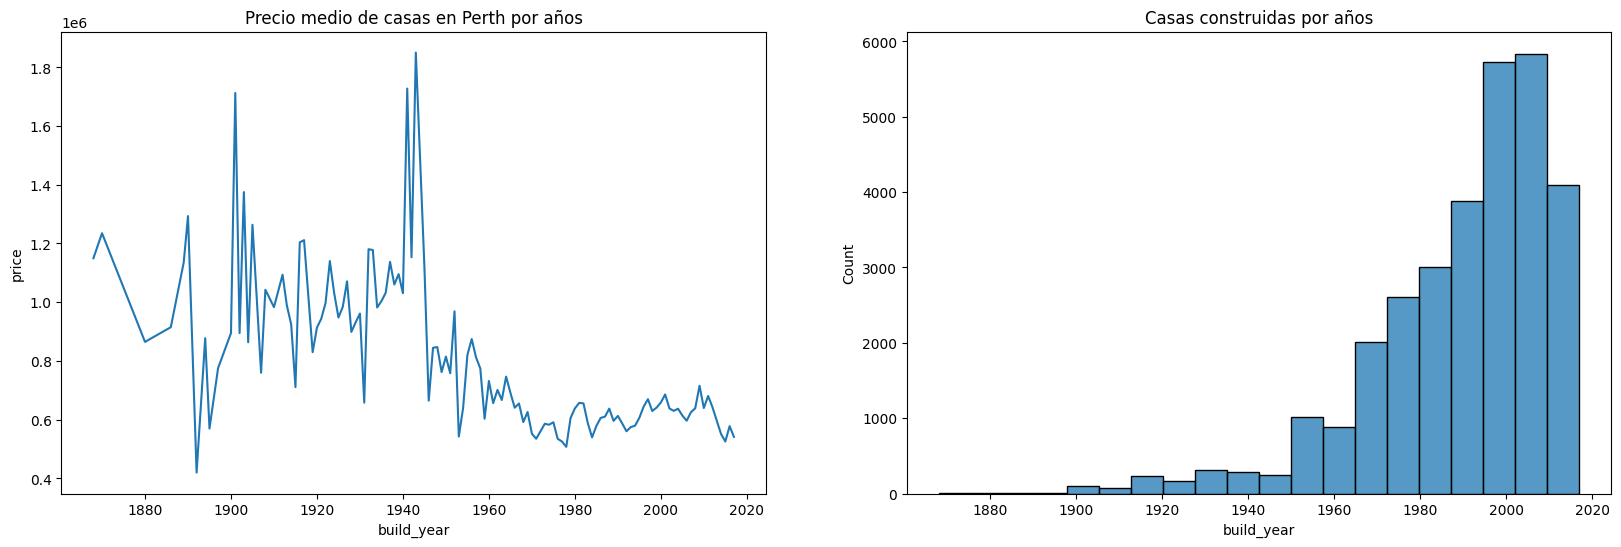

In [22]:
#INSIGHT_4
ancho_figura = 20
altura_figura = 6

fig, (g1, g2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico de caja (boxplot) utilizando Seaborn
sns.lineplot(x='build_year', y='price', data=df, ax=g1, errorbar=None)
g1.set_title("Precio medio de casas en Perth por años")

# Gráfico de conteo (countplot) utilizando Seaborn
sns.histplot(data=df, x='build_year', bins=20, ax=g2)
g2.set_title("Casas construidas por años")

**Interpretación**

*   Este gráfico lineal muestra la variación media de los precios de las casas a lo largo de los años. El pico más alto se dio en la decada de los años 40, esto debe ser analizado.
*   Cabe resaltar que este gráfico lineal solo me esta mostrando los precios medios por años, hay casas en los 2000 igual de caras de las que se presentan en dicho año.
*   Podemos observar del segundo gráfico, que durante se han transcurrido los años, se han ido construyendo más casas en Perth, y aunque en 1940 se construyeron pocas casas, estas tienen la media más cara del mercado inmobiliario.

### Insight 5

**Precios de casas por zonas vs años de construcción**

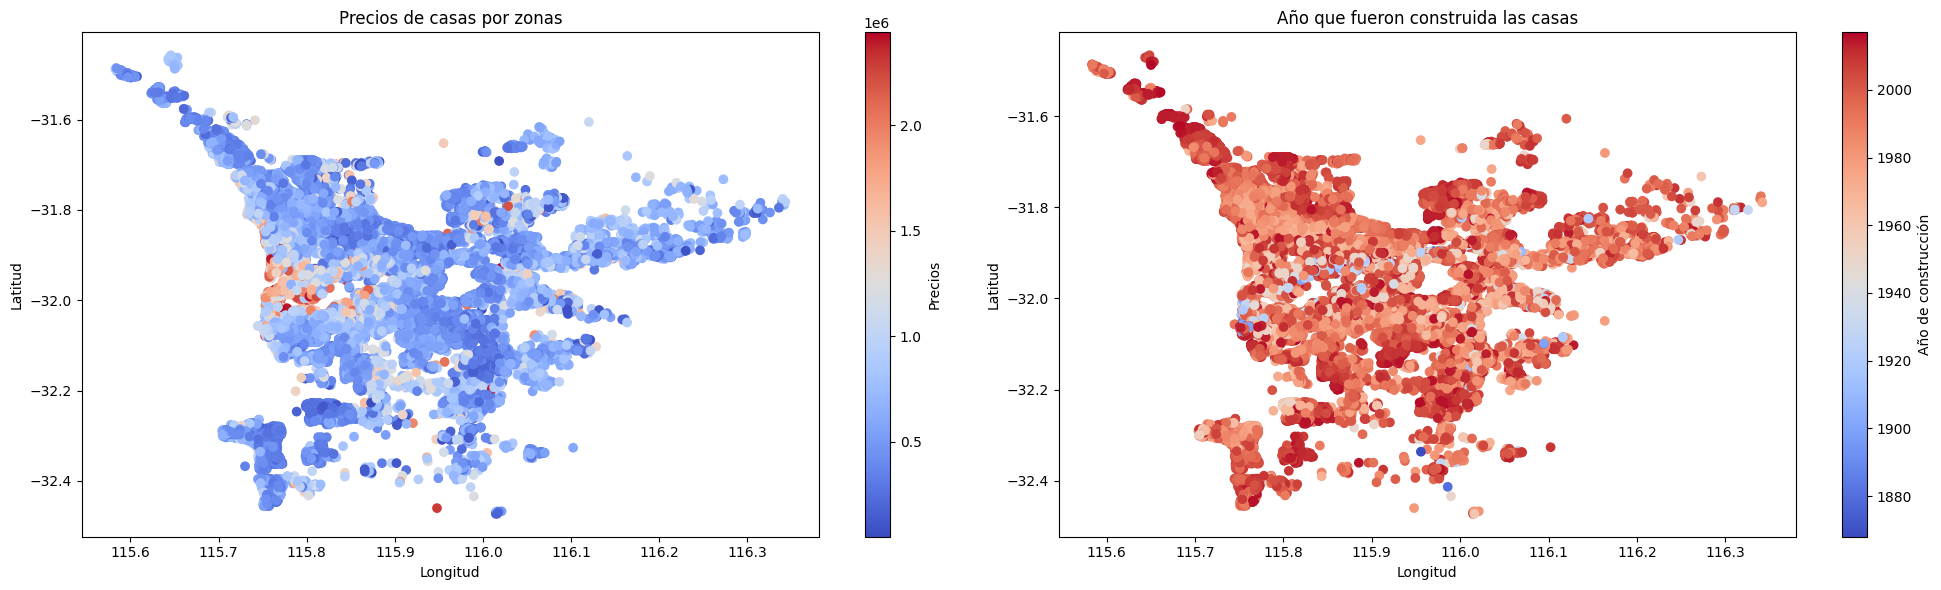

In [23]:
#INSIGHT_5

# Tamaño personalizado de la figura (ancho x altura en pulgadas)
ancho_figura = 20
altura_figura = 6

# Crear una figura y ejes para los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico 1: Precios de casas por zonas (con color según el precio)
x1 = df.longitude
y1 = df.latitude
scatter1 = ax1.scatter(x1, y1, c=df.price, cmap='coolwarm')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Precios de casas por zonas')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Precios')

# Gráfico 2: Precios de casas por zonas (con color según el año de construcción)
x2 = df.longitude
y2 = df.latitude
scatter2 = ax2.scatter(x2, y2, c=df.build_year, cmap='coolwarm')
ax2.set_xlabel('Longitud')
ax2.set_ylabel('Latitud')
ax2.set_title('Año que fueron construida las casas')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Año de construcción')

# Ajustar el espaciado entre los dos gráficos
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()

**Interpretación**

*   En el primer gráfico, podemos apreciar que los precios de las casas no suelen ser tal altos en Perth, pues estan de color azul, pero una zona especifica se encuentra de color rojo y es donde se presentan las casas más caras de Perth.

* En el segundo gráfico, podemos ver que las casas que fueron hechas en 1940, justo se encuentran en esa pequeña zona donde las casas son más caras, esto puede explicar el alto precio medio que tienen las casas construidas en 1940.

* Se podría decir, que las casas más valiosas de Perth se encuentran en una zona especifica.


### Insight 6

**Tendencia de precio-floor_area, land_area**

<ipython-input-24-81feb2e957e1>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = ax1.scatter(x1, y1, cmap='coolwarm')
<ipython-input-24-81feb2e957e1>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax2.scatter(x2, y2, cmap='vidiris')


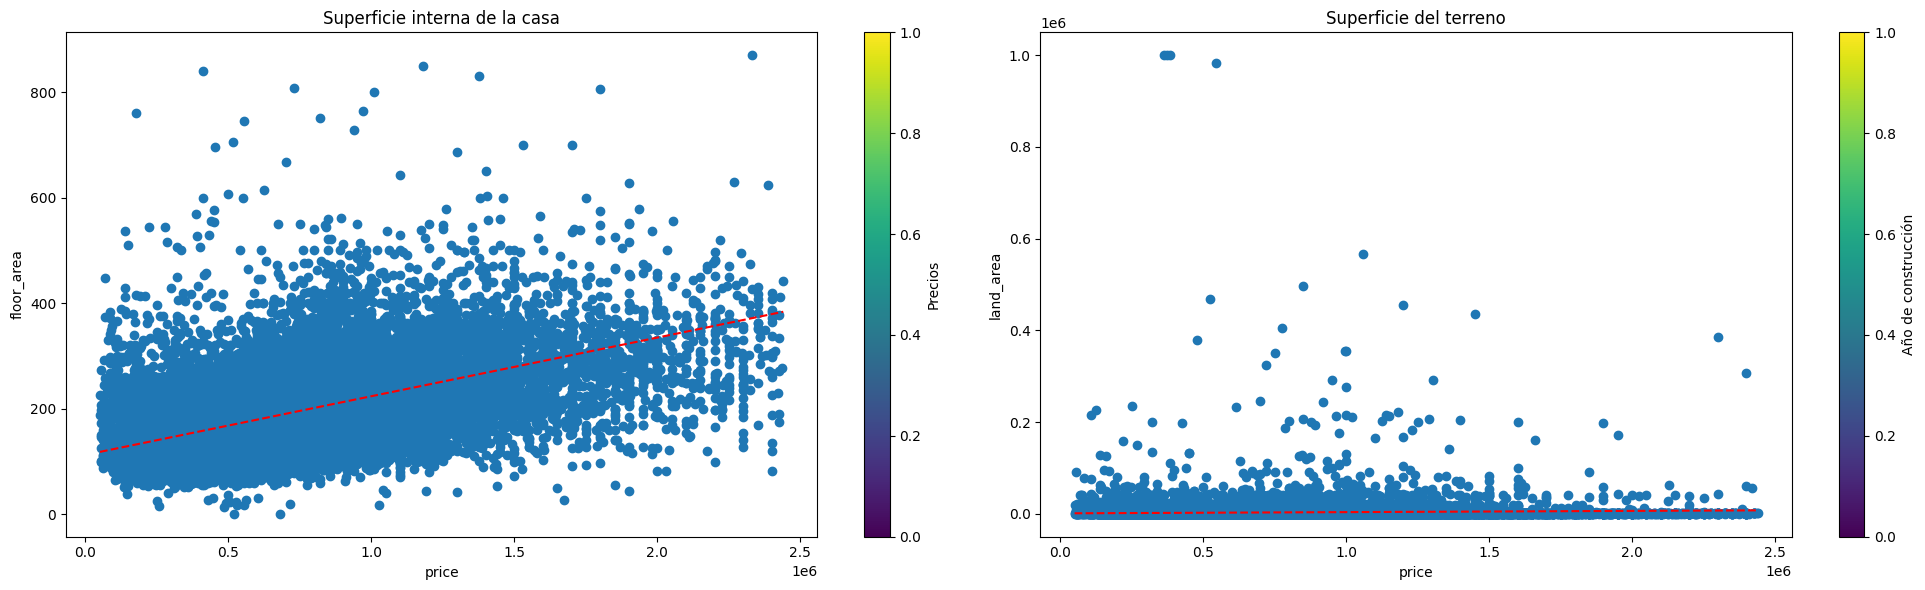

In [24]:
#INSIGHT_6

# Tamaño personalizado de la figura (ancho x altura en pulgadas)
ancho_figura = 20
altura_figura = 6

# Crear una figura y ejes para los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(ancho_figura, altura_figura))

# Gráfico 1: Precios de casas por zonas (con color según el precio)
x1 = df.price
y1 = df.floor_area
scatter1 = ax1.scatter(x1, y1, cmap='coolwarm')
ax1.set_xlabel('price')
ax1.set_ylabel('floor_area')
ax1.set_title('Superficie interna de la casa')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Precios')

# Ajustar una línea de tendencia (modelo lineal)
coefficients = np.polyfit(x1, y1, 1)
polynomial = np.poly1d(coefficients)

# Crear una línea de regresión con puntos que cubren el rango de los datos
x_range = np.linspace(min(x1), max(x1), 100)
y_range = polynomial(x_range)

# Agregar la línea de regresión al gráfico
ax1.plot(x_range, y_range, color='red', linestyle='dashed')

# Gráfico 2: Precios de casas por zonas (con color según el año de construcción)
x2 = df.price
y2 = df.land_area
scatter2 = ax2.scatter(x2, y2, cmap='vidiris')
ax2.set_xlabel('price')
ax2.set_ylabel('land_area')
ax2.set_title('Superficie del terreno')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Año de construcción')


# Ajustar una línea de tendencia (modelo lineal)
coefficients = np.polyfit(x2, y2, 1)
polynomial = np.poly1d(coefficients)

# Crear una línea de regresión con puntos que cubren el rango de los datos
x_range = np.linspace(min(x2), max(x2), 100)
y_range = polynomial(x_range)

# Agregar la línea de regresión al gráfico con color azul
ax2.plot(x_range, y_range, color='red', linestyle='dashed')

# Ajustar el espaciado entre los dos gráficos
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()

**Interpretación**

*   Como nos explico el heatmap, mientras mayor sea la superficie interna de la propiedad (m^2), mayor será el precio de la casa.

*   Mientras la superficie del terrerno (m^2), no influye en el precio.



### Insight 7

**Las 100 casas más caras**

In [25]:
# INSIGHT_7
#Ordenar el DataFrame por la columna "price" en orden descendente
df_sorted = df.sort_values(by='price', ascending=False)

# Seleccionar las características de las casas más caras (los primeros registros después de ordenar)
df_caras = df_sorted.head(100)

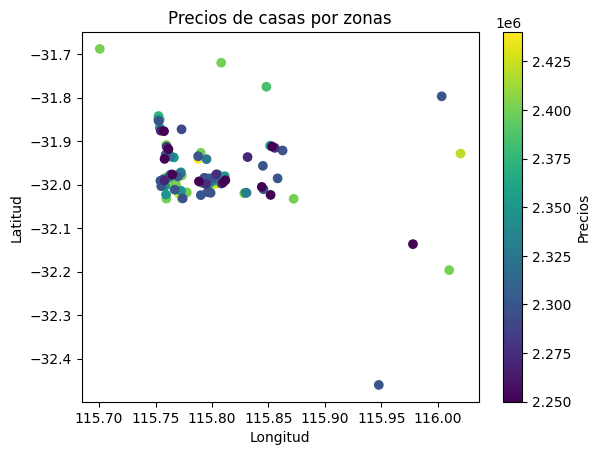

In [26]:
fig, ax = plt.subplots()
x = df_caras.longitude
y = df_caras.latitude

scatter = ax.scatter(x, y, c=df_caras.price)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Precios de casas por zonas')

cbar = plt.colorbar(scatter)
cbar.set_label('Precios')

plt.show()

**Interpretación**

*   Las 100 casas más caras van de precios de 2 240 000 y 2 425 000 , mientras que la media de total las casas era 637 072.

*   Las 100 casas más caras se encuentran mayormente en latitud [-31.9, -32.0] y [115.75,115.85]

